In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plot
import rigol_plot as rigol
import numpy as np

In [4]:
usb = rigol.list_device()
if len(usb)<1:
    adr = u''
else:
    adr = usb[0]
print(adr)

USB0::6833::1230::DS1ZA170300751::0::INSTR


In [25]:
time, data = rigol.read(adr,2)

Data size: 1212 Sample rate: 1.000000e+06 Mem. depth 600000


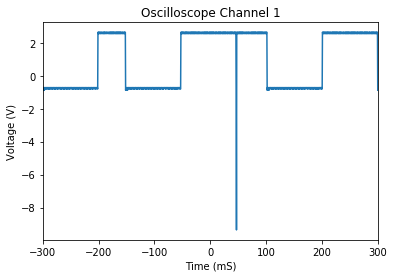

In [26]:
# See if we should use a different time axis
if (time[-1] < 1e-3):
    time = time * 1e6
    tUnit = "uS"
elif (time[-1] < 1):
    time = time * 1e3
    tUnit = "mS"
else:
    tUnit = "S"

# Plot the data
plot.plot(time, data)
plot.title("Oscilloscope Channel 1")
plot.ylabel("Voltage (V)")
plot.xlabel("Time (" + tUnit + ")")
plot.xlim(time[0], time[-1])
plot.show()